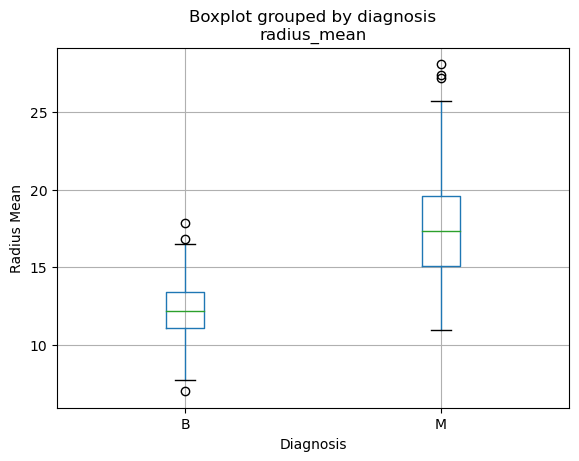

C:\Users\Aden\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


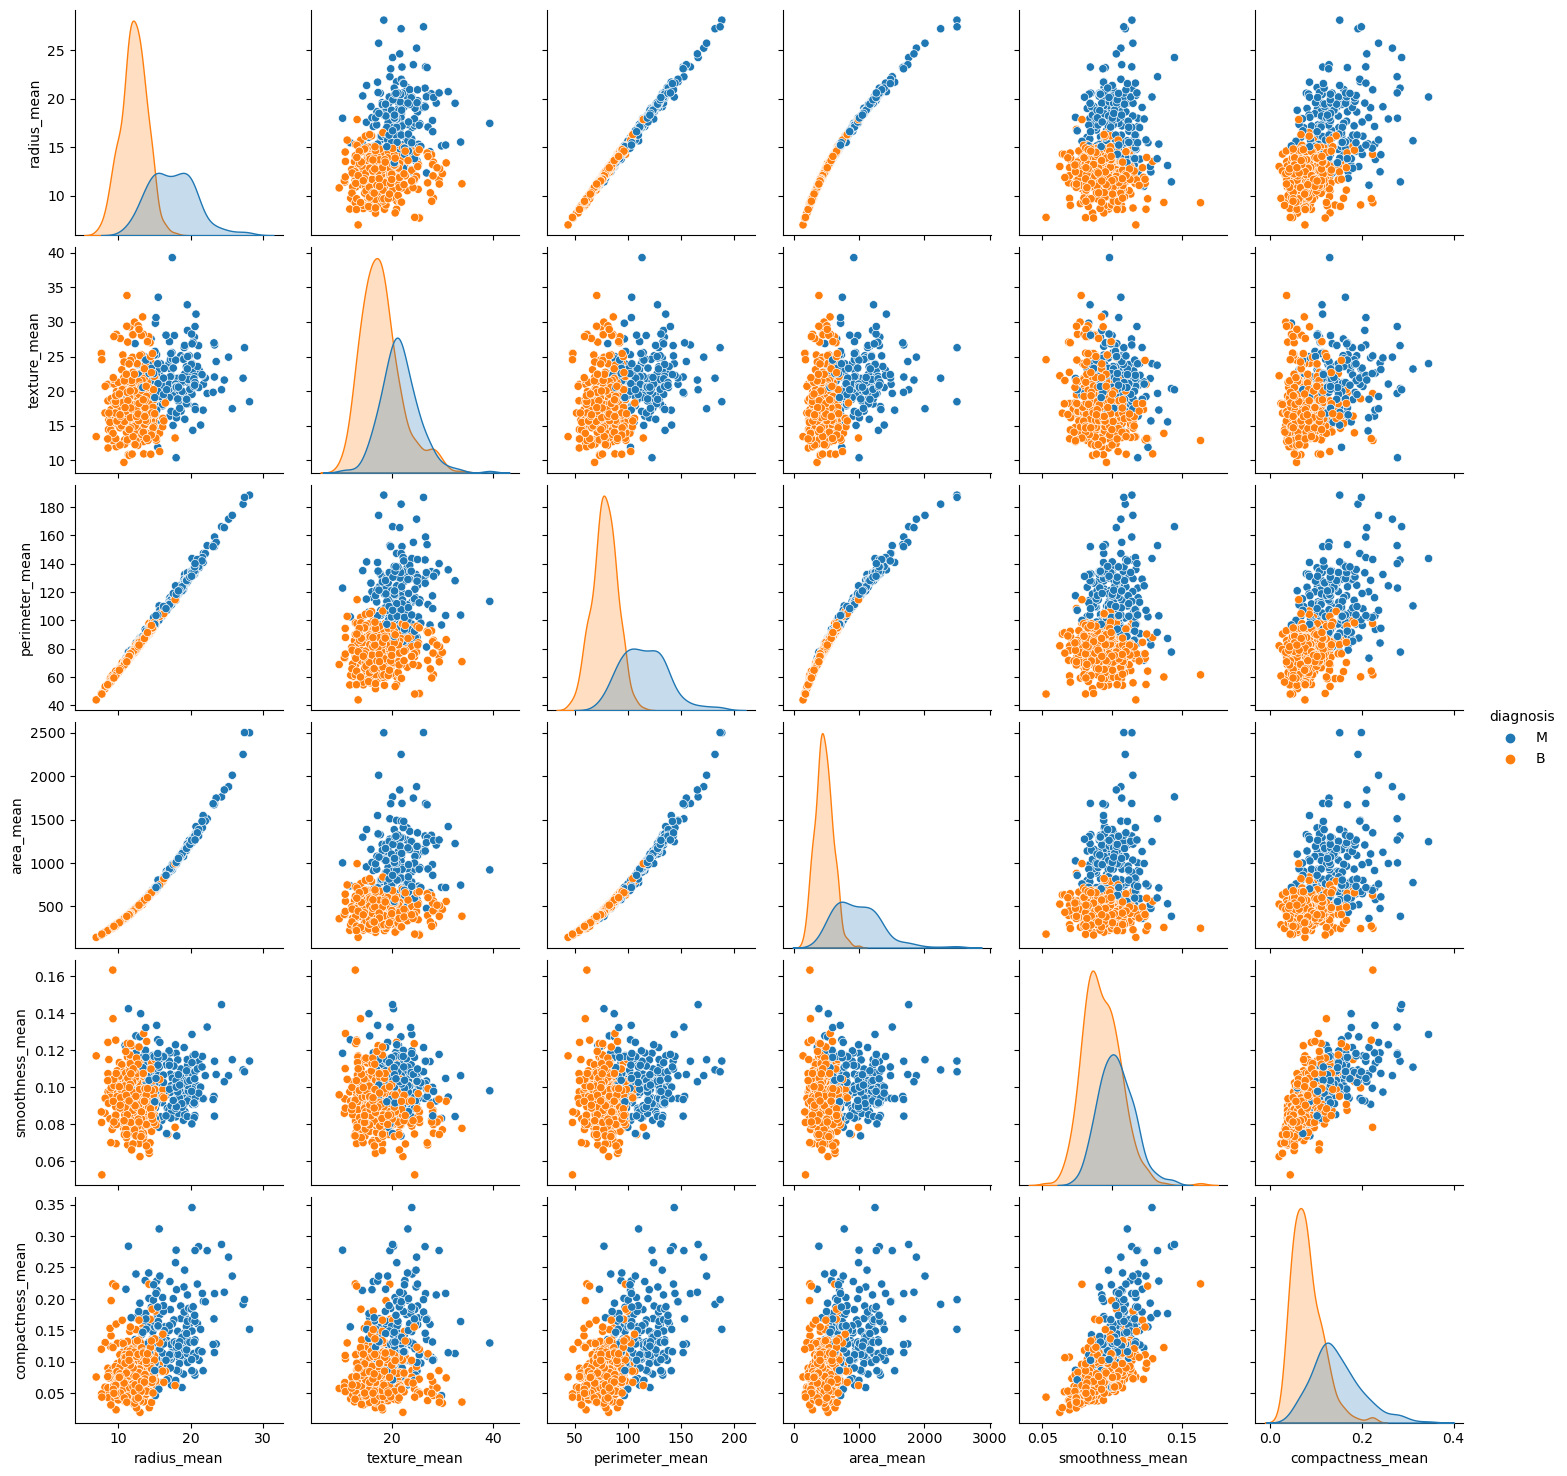

Loading BokehJS ...

Shape of X_train: (455, 6)
Shape of X_test: (114, 6)
Shape of y_train: (455,)
Shape of y_test: (114,)
Logistic Regression accuracy: 0.8771929824561403
KNN accuracy (k=5): 0.8508771929824561


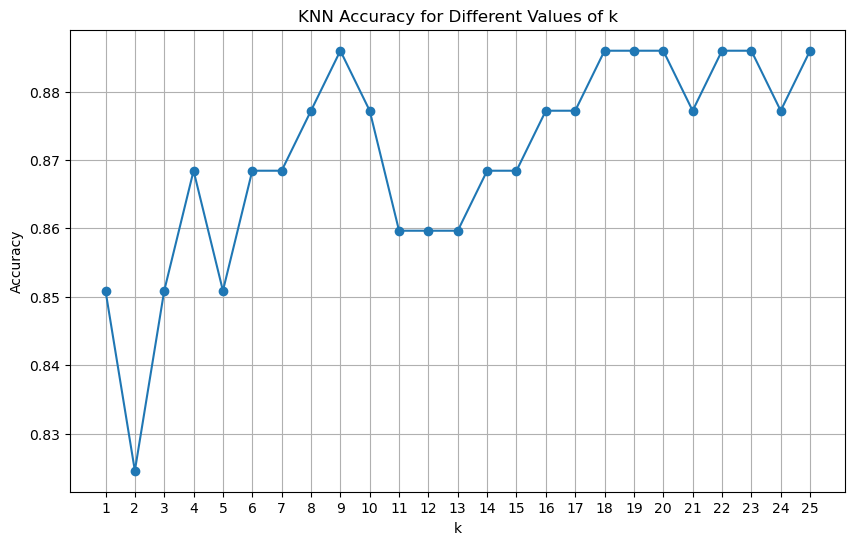

In [8]:
# Question 1: Linear Regression

# Question 2: Regression

# Question 3: Classification Model

# Question 4: The green circle would be a blue square. According to K-Nearest Neighbor algorithm, the closer the object, the more influence it has. Although the red triangles are closer, on average the blue squares are closer to the green circle.

# Question 5: Unsupervised Learning

# Question 6
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/asukul/DS201/master/datasets/BreastCancer_data.csv")
# Creating a box plot of radius_mean by diagnosis
df.boxplot(column='radius_mean', by='diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.show()

# Question 7
import seaborn as sns
columns = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "diagnosis"]
sns.pairplot(df[columns], hue='diagnosis')
plt.show()

# Question 8 
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook
output_notebook()
source = ColumnDataSource(df)
p = figure(title="Benign and Malignant texture_mean(Y) by area_mean(X) with size by Radius", x_axis_label='Area Mean', y_axis_label='Texture Mean')
p.circle(x='area_mean', y='texture_mean', size='radius_mean', fill_alpha=0.6, color='green', legend_label='Benign', source=source)
p.triangle(x='area_mean', y='texture_mean', size='radius_mean', fill_alpha=0.6, color='red', legend_label='Malignant', source=source)
p.legend.location = 'top_left'
show(p)

# Question 9
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Feature columns
features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean"]

# X and y
X = df[features]
y = df["diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Printing shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression accuracy:", lr_accuracy)

# KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN accuracy (k=5):", knn_accuracy)

# Looping over k=1 to k=25 for KNN and plotting accuracy
k_values = range(1, 26)
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_pred)
    knn_accuracies.append(knn_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, marker='o')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()